<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [5]:
# import tensorflow and keras
import tensorflow
from tensorflow import keras
from keras.datasets import cifar10
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.utils import to_categorical

In [7]:
import keras
print(keras.__version__)

3.10.0


In [9]:
print(tensorflow.__version__)

2.19.0


In [11]:
# Reproducibility set up

# Set random seed for numpy
np.random.seed(42)

# Set random seed for TensorFlow
tensorflow.random.set_seed(42)
tensorflow.keras.utils.set_random_seed(42)  # sets seeds for base-python, numpy and tf
tensorflow.config.experimental.enable_op_determinism()

In [13]:
from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [15]:
(X_train_all, t_train_all), (X_test_all, t_test_all) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step


In [17]:
# take a small sample of data
size = 50000
X_train = X_train_all[:size,:,:,:]
t_train = t_train_all[0:size,:]
X_test = X_test_all[0:size,:,:,:]
t_test = t_test_all[0:size,:]

In [19]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

## Check some data

In [21]:
def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)


    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):

    #if (compare) and (actual is not None) and (l_id != np.argmax(actual[id], axis=0)):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [23]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

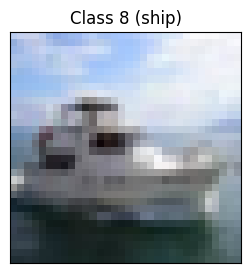

In [25]:
check_one(X_train, t_train.flatten())

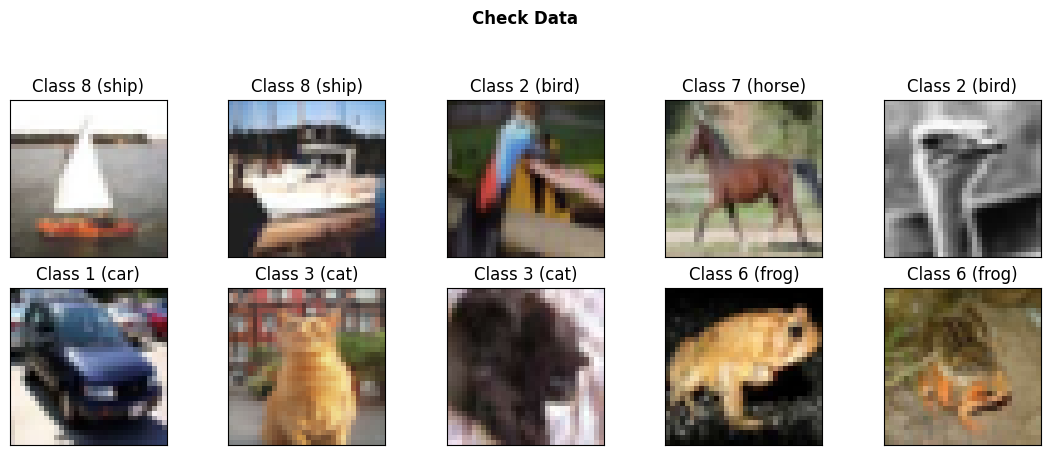

In [27]:
check_ten(X_train, t_train.flatten())

## Prepare data

In [29]:
# Prepare input data
_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(t_train.flatten()))

# Convert the target to categorical
y_train = to_categorical(
    t_train,
    num_classes = num_classes)
y_test = to_categorical(
    t_test,
    num_classes = num_classes)

In [31]:
t_train[0]

array([6], dtype=uint8)

In [33]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [35]:
model = Sequential()

In [37]:
model.add(Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

C:\Users\matth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 48)     │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 96)     │        41,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 192)      │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,172,410 (4.47 MB)

 Trainable params: 1,172,410 (4.47 MB)

 Non-trainable params: 0 (0.00 B)

None


## Compile the model

In [41]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Fit the training data

In [43]:
# Uncomment the statement below to allow online monitoring with TensorBoard
# tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

# Create a directory named 'logs' if it doesn't exist. This is necessary for TensorBoard to work

log_dir = 'logs'

if not os.path.exists(log_dir):
    os.makedirs(log_dir)

In [45]:
tensorboard = TensorBoard(log_dir = 'logs')

In [47]:
%%time
# Fit the model on a training set
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = 100,
    batch_size = 100,
    callbacks = [tensorboard],
    verbose = 1)
print(f'Training accuracy:{history.history["accuracy"][-1]:.2f} validation accuracy:{history.history["val_accuracy"][-1]:.2f} ')

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.1446 - loss: 2.6293 - val_accuracy: 0.3880 - val_loss: 1.6662
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.3608 - loss: 1.7057 - val_accuracy: 0.4820 - val_loss: 1.4121
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.4575 - loss: 1.4823 - val_accuracy: 0.5504 - val_loss: 1.2184
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5248 - loss: 1.3223 - val_accuracy: 0.5895 - val_loss: 1.1245
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5659 - loss: 1.2243 - val_accuracy: 0.6350 - val_loss: 1.0259
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.6058 - loss: 1.1362 - val_accuracy: 0.6540 - val_loss: 0.9714
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.6257 - loss: 1.0731 - val_accuracy: 0.6633 - val_loss: 0.9452
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.6419 - loss: 1

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit.
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [49]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
# Uncomment and run the code below if unable to visualise TensorBoard a second time.
#%reload_ext tensorboard
#%tensorboard --logdir logs --port=6007

In [51]:
%tensorboard --logdir logs --port 6006

ERROR: Failed to launch TensorBoard (exited with 4294967295).
Contents of stderr:
2025-07-05 15:35:28.053622: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-05 15:35:28.598964: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
E0705 15:35:31.291868 22612 program.py:300] TensorBoard could not bind to port 6006, it was already in use
ERROR: TensorBoard could not bind to port 6006, it was already in use

## Create predictions

In [53]:
%%time

predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
CPU times: total: 17.9 s
Wall time: 1.58 s


## Evaluate the model

In [55]:
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7706 - loss: 0.7616

Test loss: 0.757728, Test accuracy: 0.771000


In [57]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [59]:
# Convert predicted probabilities to class labels
predictions_class = np.argmax(predictions, axis=1)

# Convert y_test to class indices for comparison with predictions
y_test_target = np.argmax(y_test, axis = 1)

# Now use these class labels to compute the confusion matrix
cm = confusion_matrix(y_test_target, predictions_class)
print_cm(cm)

   |   0   1   2   3   4   5   6   7   8   9 
---------------------------------------------
  0| 729   9  53  31  21   3  15   8  82  49 
  1|  11 874   3   7   3   0  20   3  24  55 
  2|  35   0 689  52  83  30  75  23   6   7 
  3|  27   2  60 573 104  76  98  32   9  19 
  4|  10   0  52  39 798   4  57  31   3   6 
  5|   6   1  53 189  73 570  46  53   2   7 
  6|   2   0  38  25  20   8 894   3   9   1 
  7|  14   2  22  60  48  12  12 821   1   8 
  8|  29  23  14  11   3   1  13   2 867  37 
  9|  16  44   4   9   2   1   8   7  14 895 


In [61]:
print(type(y_test_target), type(predictions_class))
print(len(y_test_target), len(predictions_class))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
10000 10000


## Visualisation of cost

In [63]:
# When you run the code below, it will display a list of available keys. These keys correspond to the recorded metrics during training.

print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


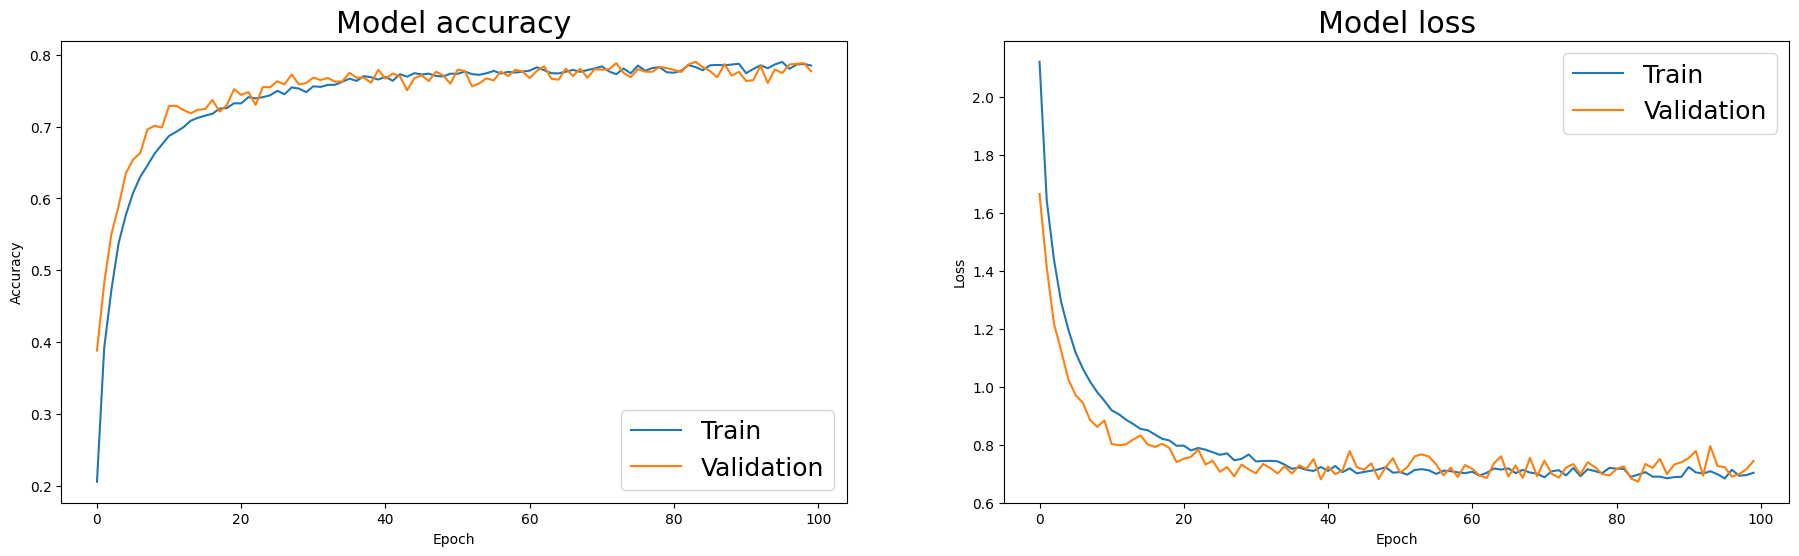

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Results

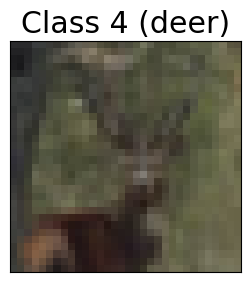

In [67]:
check_one(X_test, predictions_class, actual = y_test, compare = True)

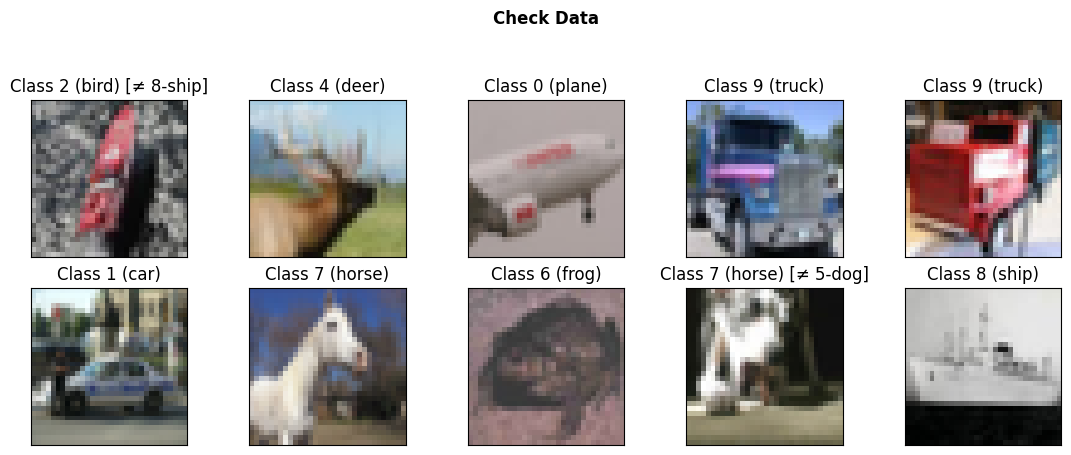

In [69]:
check_ten(X_test, predictions_class, y_test, True)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



